Code to resplit all of the original train + test into 3 new train + val + test

Combining into 80/10/10 split

In [2]:
import pandas as pd
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
trainDf = pd.read_csv("../original_dataset/annotations/image_labels_train.csv")
trainDf = trainDf.drop(["rad_id"], axis = 1)
testDf = pd.read_csv("../original_dataset/annotations/image_labels_test.csv")
testDf.rename(columns = {"Other disease": "Other diseases"}, inplace = True)
originalDf = pd.concat([trainDf, testDf])
#originalDf = originalDf.drop(["rad_id"], axis = 1)
originalDf = originalDf.groupby("image_id").max().reset_index() #as combined

originalDf.describe()

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,ILD,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.184333,0.015167,0.036222,0.145833,0.001611,0.024944,0.000722,0.004667,0.007722,0.034333,...,0.006333,0.102111,0.005611,0.069333,0.002111,0.020611,0.064722,0.050778,0.279667,0.703167
std,0.387767,0.122219,0.186848,0.352949,0.040107,0.155960,0.026865,0.068155,0.087539,0.182089,...,0.079332,0.302803,0.074699,0.254027,0.045900,0.142082,0.246042,0.219550,0.448848,0.456875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = originalDf.index.values.reshape(-1,1)
X

#trainDf = originalDf.drop(["COPD","Lung tumor","Pneumonia","Tuberculosis","Other diseases","No finding"], axis = 1)
originalDf = originalDf.drop(["COPD","Lung tumor","Pneumonia","Tuberculosis","Other diseases","No finding"], axis = 1)
y = originalDf.drop(["image_id"], axis = 1)
y = y.values

y = np.asmatrix(y)
print(np.shape(y))

(18000, 22)


In [7]:
Counter(combination for row in get_combination_wise_output_matrix(y.A, order=2) for combination in row)

Counter({(np.int64(0), np.int64(0)): 3318,
         (np.int64(3), np.int64(3)): 2625,
         (np.int64(17), np.int64(17)): 2179,
         (np.int64(0), np.int64(3)): 2068,
         (np.int64(19), np.int64(19)): 1838,
         (np.int64(11), np.int64(11)): 1415,
         (np.int64(0), np.int64(17)): 1373,
         (np.int64(21), np.int64(21)): 1248,
         (np.int64(16), np.int64(16)): 1149,
         (np.int64(17), np.int64(19)): 1053,
         (np.int64(15), np.int64(15)): 1017,
         (np.int64(0), np.int64(19)): 962,
         (np.int64(3), np.int64(17)): 893,
         (np.int64(16), np.int64(17)): 865,
         (np.int64(0), np.int64(11)): 783,
         (np.int64(0), np.int64(21)): 737,
         (np.int64(11), np.int64(17)): 726,
         (np.int64(11), np.int64(19)): 683,
         (np.int64(10), np.int64(10)): 671,
         (np.int64(2), np.int64(2)): 652,
         (np.int64(17), np.int64(21)): 639,
         (np.int64(9), np.int64(9)): 618,
         (np.int64(0), np.int64(16))

In [20]:
np.random.seed(1243)
X_train, y_train, X_testval, y_testval = iterative_train_test_split(X, y, test_size = 0.2)

X_val, y_val, X_test, y_test = iterative_train_test_split(X_testval, y_testval, test_size = 0.5)

In [21]:
pd.DataFrame({
    'test': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.A, order=2) for combination in row),
    'val' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val.A, order=2) for combination in row),    
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test.A, order=2) for combination in row)
}).T.fillna(0.0)

,"(np.int64(10), np.int64(15))","(np.int64(5), np.int64(15))","(np.int64(5), np.int64(5))","(np.int64(5), np.int64(11))","(np.int64(10), np.int64(11))","(np.int64(10), np.int64(10))","(np.int64(5), np.int64(10))","(np.int64(11), np.int64(15))","(np.int64(11), np.int64(11))","(np.int64(15), np.int64(15))",...,"(np.int64(4), np.int64(9))","(np.int64(4), np.int64(21))","(np.int64(9), np.int64(20))","(np.int64(4), np.int64(17))","(np.int64(4), np.int64(20))","(np.int64(4), np.int64(10))","(np.int64(4), np.int64(19))","(np.int64(4), np.int64(11))","(np.int64(1), np.int64(7))","(np.int64(2), np.int64(7))"
test,12.0,13.0,48.0,30.0,39.0,71.0,16.0,40.0,148.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
val,12.0,13.0,48.0,31.0,38.0,64.0,15.0,41.0,141.0,101.0,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [22]:
trainSplit = originalDf.loc[X_train.flatten()]
valSplit = originalDf.loc[X_val.flatten()]
testSplit = originalDf.loc[X_test.flatten()]

In [23]:
trainSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
0,000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00053190460d56c53cc3e57321387478,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,000ae00eb3942d27e0b97903dd563a6e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,000d68e42b71d3eac10ccc077aba07c1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,ffceb71a80efba3b83c88e11f4b9694b,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17993,ffe0131765a4c58a0f59abb68b192dbd,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17995,ffe6f9fe648a7ec29a50feb92d6c15a4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17997,ffeffc54594debf3716d6fcd2402a99f,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
valSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
4,0007d316f756b3fa0baea2ff514ce945,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,0061cf6d35e253b6e7f03940592cc35e,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
25,00675cd546313f912cadd4ad54415d69,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,009d837e29ba400e03856cf8d6a5b545,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44,00aca42a24e4ea6066cca2546150c36e,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,ff8e792afe941fdc029a9b898c71510d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17986,ffbecda150d808687714dd54bd3cb2a6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17987,ffc1b43cc2533b8adc71fb5237526523,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17988,ffc441e0c8b7153844047483a577e7c3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
testSplit

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Lung cavity,Lung cyst,Mediastinal shift,Nodule/Mass,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion
2,0005e8e3701dfb1dd93d53e2ff537b6e,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,00150343289f317a0ad5629d5b7d9ef9,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
15,0046f681f078851293c4e710c4466058,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41,00a2145de1886cb9eb88869c85d74080,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,00f2f97f74e086e1f82acc285ee4a5c5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967,ff60d1425ffd67d12aa61e3eb3b45040,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,1,0,1
17989,ffca438a223950751c479664fb657a97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17992,ffdd027d6aa68286ea30c61ab6f58454,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17996,ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


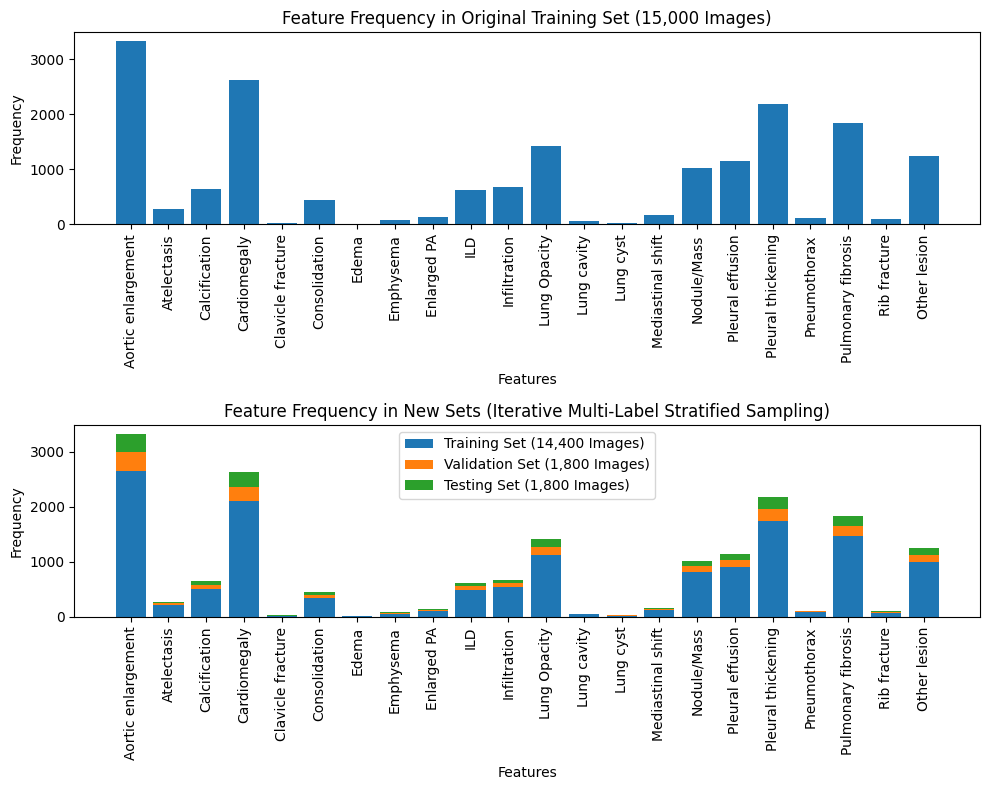

In [29]:
original_freq = originalDf.drop("image_id", axis = 1).sum()
train_freq = trainSplit.drop("image_id", axis = 1).sum()
val_freq = valSplit.drop("image_id", axis = 1).sum()
test_freq = testSplit.drop("image_id", axis = 1).sum()

# Calculate the frequency of each feature in the validation set

# Plot the bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Original df bar chart
axes[0].bar(original_freq.index, original_freq.values)
axes[0].set_title('Feature Frequency in Original Training Set (15,000 Images)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Training set bar chart
axes[1].bar(train_freq.index, train_freq.values)
axes[1].bar(test_freq.index, test_freq.values, bottom = train_freq.values)
axes[1].bar(val_freq.index, val_freq.values, bottom = test_freq.values + train_freq.values)
axes[1].set_title('Feature Frequency in New Sets (Iterative Multi-Label Stratified Sampling)')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

axes[1].legend(["Training Set (14,400 Images)", "Validation Set (1,800 Images)", "Testing Set (1,800 Images)"])

plt.tight_layout()
plt.savefig("TrainValDistribution.pdf")
plt.show()

In [30]:
print(pd.DataFrame(zip(original_freq.index,original_freq, test_freq, val_freq)))

                     0     1    2    3
0   Aortic enlargement  3318  332  332
1          Atelectasis   273   28   27
2        Calcification   652   67   73
3         Cardiomegaly  2625  263  262
4    Clavicle fracture    29    4    3
5        Consolidation   449   48   48
6                Edema    13    2    1
7            Emphysema    84   10   12
8          Enlarged PA   139   15   14
9                  ILD   618   67   57
10        Infiltration   671   71   64
11        Lung Opacity  1415  148  141
12         Lung cavity    60    8    5
13           Lung cyst    35    7    3
14   Mediastinal shift   170   19   18
15         Nodule/Mass  1017  102  101
16    Pleural effusion  1149  121  114
17  Pleural thickening  2179  217  227
18        Pneumothorax   114   12   11
19  Pulmonary fibrosis  1838  184  185
20        Rib fracture   101   10   10
21        Other lesion  1248  130  120


In [173]:
trainSplit.to_csv("image_labels_trainNEW.csv", index = None)
valSplit.to_csv("image_labels_valNEW.csv", index = None)
testSplit.to_csv("image_labels_testNEW.csv", index = None)

In [31]:
print(trainSplit[trainSplit["image_id"].isin(list(valSplit["image_id"]))])
print(trainSplit[trainSplit["image_id"].isin(list(testSplit["image_id"]))])
print(valSplit[valSplit["image_id"].isin(list(trainSplit["image_id"]))])
print(valSplit[valSplit["image_id"].isin(list(testSplit["image_id"]))])
print(testSplit[testSplit["image_id"].isin(list(trainSplit["image_id"]))])
print(testSplit[testSplit["image_id"].isin(list(valSplit["image_id"]))])

#we know that there is no overlap of images

Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastinal shift, Nodule/Mass, Pleural effusion, Pleural thickening, Pneumothorax, Pulmonary fibrosis, Rib fracture, Other lesion]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [image_id, Aortic enlargement, Atelectasis, Calcification, Cardiomegaly, Clavicle fracture, Consolidation, Edema, Emphysema, Enlarged PA, ILD, Infiltration, Lung Opacity, Lung cavity, Lung cyst, Mediastina